C:\Users\18pep\Documents\sem_I\AML\labs\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\18pep\Documents\sem_I\AML\labs\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

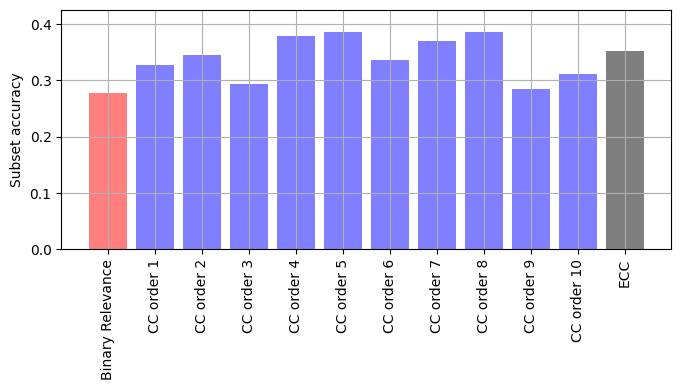

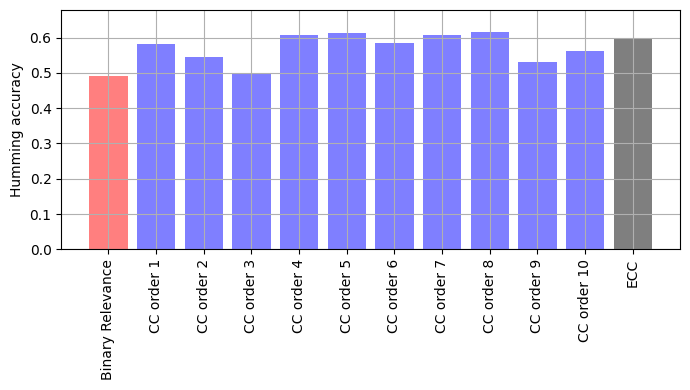

In [77]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.metrics import jaccard_score
# DATASET:
X, Y = fetch_openml("emotions", version=4, return_X_y=True)
Y = Y == "TRUE"
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)



# BINARY RELEVANCE METHOD:
base_lr = LogisticRegression()
ovr = OneVsRestClassifier(base_lr)
ovr.fit(X_train, Y_train)
Y_pred_ovr = ovr.predict(X_test)
ovr_jaccard_score = jaccard_score(Y_test, Y_pred_ovr,average="samples")
ovr_accuracy_score = accuracy_score(Y_test, Y_pred_ovr)



# CLASSIFIER CHAIN METHOD:
chains = [ClassifierChain(base_lr, order="random", random_state=i) for i in range(10)]
for chain in chains:
    chain.fit(X_train, Y_train)

Y_pred_chains = np.array([chain.predict_proba(X_test) for chain in chains])
chain_accuracy_scores = [
    accuracy_score(Y_test, Y_pred_chain >= 0.5)
    for Y_pred_chain in Y_pred_chains
]
chain_jaccard_score=[
    jaccard_score(Y_test, Y_pred_chain >= 0.5,average="samples")
    for Y_pred_chain in Y_pred_chains]
# ECC METHOD:
Y_pred_ensemble = Y_pred_chains.mean(axis=0)
ensemble_accuracy_score = accuracy_score(
    Y_test, Y_pred_ensemble >= 0.5
)

ensemble_jaccard_score = jaccard_score(
    Y_test, Y_pred_ensemble >= 0.5,average="samples"
)
#PLOT Subset Accuracy:
    
model_scores = [ovr_accuracy_score] + chain_accuracy_scores + [ensemble_accuracy_score]

model_names = (
    "Binary Relevance",
    "CC order 1",
    "CC order 2",
    "CC order 3",
    "CC order 4",
    "CC order 5",
    "CC order 6",
    "CC order 7",
    "CC order 8",
    "CC order 9",
    "CC order 10",
    "ECC",
)

x_pos = np.arange(len(model_names))

fig, ax = plt.subplots(figsize=(7, 4))
ax.grid(True)
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names, rotation="vertical")
ax.set_ylabel("Subset accuracy")
ax.set_ylim([0,max(model_scores)*1.1])
colors = ["red"] + ["blue"] * len(chain_accuracy_scores) + ["black"]
ax.bar(x_pos, model_scores, alpha=0.5, color=colors)
plt.tight_layout()
plt.show()    


##HUMMING SCORE    
model_scores = [ovr_jaccard_score] + chain_jaccard_score + [ensemble_jaccard_score]

model_names = (
    "Binary Relevance",
    "CC order 1",
    "CC order 2",
    "CC order 3",
    "CC order 4",
    "CC order 5",
    "CC order 6",
    "CC order 7",
    "CC order 8",
    "CC order 9",
    "CC order 10",
    "ECC",
)

x_pos = np.arange(len(model_names))

fig, ax = plt.subplots(figsize=(7, 4))
ax.grid(True)
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names, rotation="vertical")
ax.set_ylabel("Humming accuracy")
ax.set_ylim([0,max(model_scores)*1.1])
colors = ["red"] + ["blue"] * len(chain_accuracy_scores) + ["black"]
ax.bar(x_pos, model_scores, alpha=0.5, color=colors)
plt.tight_layout()
plt.show()    

